In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',10)

In [2]:
ds=pd.read_csv('Quick_car.csv')

In [3]:
ds.head(1000)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [5]:
ds['name'].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

In [6]:
# year has many no year values. It must be from obj to int.
# Price has ask for price, and need to be in int.
# kms_driven has kms along with integers, a nan value and some string also, need to be in int.
# fuel_type has nan value.
# name column has error, as it has version along with it. it is neither categorical nor usable for model in this form.
## so we are keeping only first three words of name.

In [7]:
# removing the data which has year as str and converting the column into int.
ds=ds[ds['year'].str.isnumeric()]
ds['year']=ds['year'].astype(int)

In [8]:
# now we need to remove ask for price from the price column and convert it into int by removing commas.
ds=ds[ds['Price']!='Ask For Price']
ds['Price']=ds['Price'].str.replace(',','').astype(int)


In [9]:
# cleaning kms_driven
ds['kms_driven']=ds['kms_driven'].str.split(' ').str.get(0).str.replace(',','')
ds=ds[ds['kms_driven'].str.isnumeric()]
ds['kms_driven']=ds['kms_driven'].astype(int)

In [10]:
ds=ds[~ds['fuel_type'].isna()]

In [11]:
# in the name, we need only first 3 words. So, splitting them, then slicing & joining
ds['name']=ds['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [12]:
ds=ds.reset_index(drop=True)

In [13]:
ds.head(1000)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [14]:
ds.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x2aaf2ddb850>,
 'caps': [<matplotlib.lines.Line2D at 0x2aaf2ddbeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2aaf2ddb6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2aaf349a3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2aaf349a6a0>],
 'means': []}

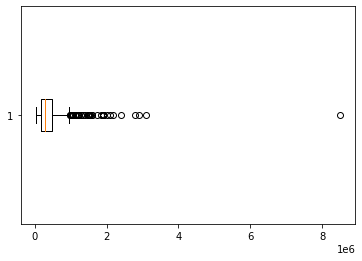

In [15]:
plt.boxplot(ds['Price'],vert=False)

Here we can see that the value above 8x10^6 is basically an outlier, so removing it.


{'whiskers': [<matplotlib.lines.Line2D at 0x2aaf3512b50>,
 'caps': [<matplotlib.lines.Line2D at 0x2aaf3522130>,
 'boxes': [<matplotlib.lines.Line2D at 0x2aaf3512880>],
 'medians': [<matplotlib.lines.Line2D at 0x2aaf3522700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2aaf35229d0>],
 'means': []}

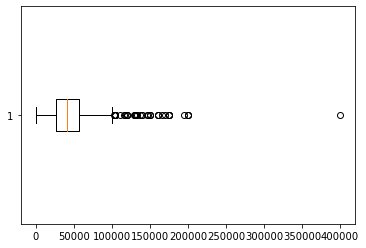

In [16]:
plt.boxplot(ds['kms_driven'],vert=False)

Outlier detected again

In [17]:
ds=ds[ds['Price']<7e6]
ds=ds[ds['kms_driven']<350000].reset_index(drop=True)

In [18]:
ds.head(1000)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
809,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
810,Tata Indica V2,Tata,2009,110000,30000,Diesel
811,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
812,Tata Zest XM,Tata,2018,260000,27000,Diesel


{'whiskers': [<matplotlib.lines.Line2D at 0x2aaf3588ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x2aaf35970a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2aaf35887f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2aaf3597640>],
 'fliers': [<matplotlib.lines.Line2D at 0x2aaf3597910>],
 'means': []}

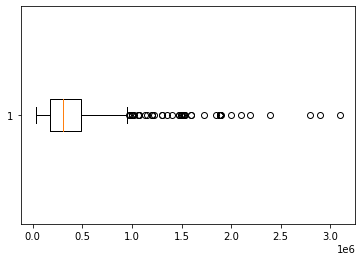

In [19]:
plt.boxplot(ds['Price'],vert=False)


{'whiskers': [<matplotlib.lines.Line2D at 0x2aaf35f3c10>,
 'caps': [<matplotlib.lines.Line2D at 0x2aaf36001f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2aaf35f3940>],
 'medians': [<matplotlib.lines.Line2D at 0x2aaf3600790>],
 'fliers': [<matplotlib.lines.Line2D at 0x2aaf3600a60>],
 'means': []}

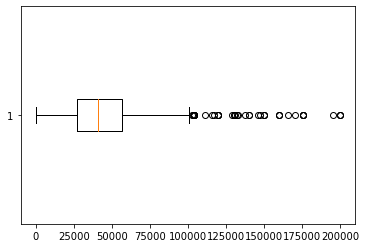

In [20]:
plt.boxplot(ds['kms_driven'],vert=False)

In [21]:
ds.to_csv('Cleaned car.csv')

# Model Building

In [22]:
# dividing dependent and independent features
X = ds.drop(columns='Price')
Y = ds['Price']

In [23]:
X.head(10)

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
5,Hyundai Eon,Hyundai,2013,25000,Petrol
6,Ford EcoSport Ambiente,Ford,2016,24530,Diesel
7,Maruti Suzuki Alto,Maruti,2015,60000,Petrol
8,Skoda Fabia Classic,Skoda,2010,60000,Petrol
9,Maruti Suzuki Stingray,Maruti,2015,30000,Petrol


In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
# from sklearn.impute import SimpleImputer
## SimpleImputer is used for removing Nan values

In [26]:
one=OneHotEncoder()
lr=LinearRegression()
one.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [27]:
one.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [28]:
column_trans = make_column_transformer((OneHotEncoder(categories=one.categories_),['name','company','fuel_type']),remainder='passthrough')

In [29]:
pipe=make_pipeline(column_trans,lr)

In [30]:
pipe.fit(xtrain,ytrain)
# now pipeline will automatically transform the raw data first and then apply regression on it.

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [31]:
ypredict=pipe.predict(xtest)

In [32]:
r2_score(ytest,ypredict)

0.7615177372386083

In [33]:
#now checking different train test split and choosing for one that gives us max r2 score
scores=[]
for i in range(1000):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(xtrain,ytrain)
    ypredict=pipe.predict(xtest)
    scores.append(r2_score(ytest,ypredict))

In [34]:
np.argmax(scores)

124

In [35]:
scores[np.argmax(scores)]

0.9040425347844676

so we will train the model using this random state i.e., 124


In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=124)
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(xtrain,ytrain)
ypredict=pipe.predict(xtest)
r2_score(ytest,ypredict)

0.9040425347844676

In [50]:
X.loc[X['company']=='Toyota','name'].unique()

array(['Toyota Innova 2.0', 'Toyota Corolla Altis', 'Toyota Etios GD',
       'Toyota Etios Liva', 'Toyota Innova 2.5', 'Toyota Etios',
       'Toyota Fortuner', 'Toyota Fortuner 3.0', 'Toyota Corolla H2',
       'Toyota Corolla', 'Toyota Etios G', 'Toyota Qualis'], dtype=object)

In [49]:
pipe.predict(pd.DataFrame([['Toyota Fortuner','Toyota',2019,3000,'Petrol']],columns=['name', 'company', 'year', 'kms_driven', 'fuel_type']))

array([1225455.62301289])